In [1]:
# imports
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#get data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# test and validate split
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5)


In [3]:
# reshape data
train_images = train_images.reshape(60000,28,28,1)
val_images = val_images.reshape(5000,28,28,1)
test_images = test_images.reshape(5000,28,28,1)

In [4]:
# convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, 10)
val_labels = keras.utils.to_categorical(val_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [5]:
# setup model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [7]:
# train model
history = model.fit(train_images, train_labels, 
                    batch_size = 128,
                    epochs=10, 
                    verbose = 1,
                    validation_data=(val_images, val_labels))

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 1.1762 - accuracy: 0.6189 - val_loss: 0.1250 - val_accuracy: 0.9660
Epoch 2/10
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.3960 - accuracy: 0.8636 - val_loss: 0.0700 - val_accuracy: 0.9794
Epoch 3/10
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.2732 - accuracy: 0.9098 - val_loss: 0.0648 - val_accuracy: 0.9800
Epoch 4/10
60000/60000 [==============================] - 102s 2ms/sample - loss: 0.2268 - accuracy: 0.9246 - val_loss: 0.0523 - val_accuracy: 0.9848
Epoch 5/10
60000/60000 [==============================] - 101s 2ms/sample - loss: 0.2042 - accuracy: 0.9321 - val_loss: 0.0479 - val_accuracy: 0.9832
Epoch 6/10
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.1914 - accuracy: 0.9374 - val_loss: 0.0409 - val_accuracy: 0.9886
Epoch 7/10
60000/60000 [=============================

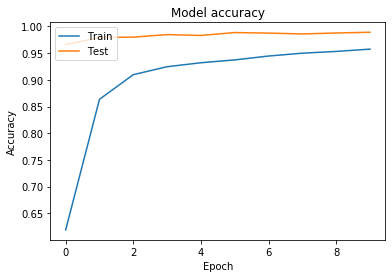

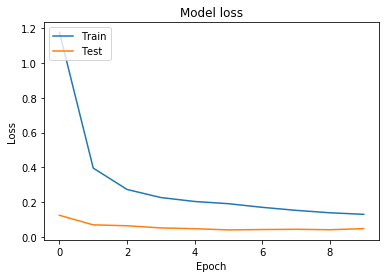

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
# evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy: ', test_acc)

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test accuracy:  0.9906


In [10]:
model.save("MNIST_digits_recognition.h5")